# Деконволюция изображений

Рассмотрим на практике работу алгоритмов де-конволюции.

In [6]:
# подгрузим необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration
from scipy.signal import convolve2d as conv2
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.util import img_as_float

Подгрузим изображение, сделаем размытие некоторым фильтром и добавим шум.

In [3]:
im_orig = color.rgb2gray(data.astronaut())
im_orig = img_as_float(data.camera())
im_orig = color.rgb2gray(plt.imread('source/text.jpg'))

psf = np.ones((5, 5)) / 25
# mode = 'same' значит результат того же размера
img_noise = conv2(im_orig, psf, 'same')
# добавим шум с дисперсией в 0.1 от дисперсии изображения.
img_noise = img_noise + 0.02 * np.random.randn(*im_orig.shape)

Рассмотрим работу фильтра Винера.

In [9]:
deconvolved_img = restoration.wiener(img_noise, psf, 0.02)
print('PSNR до:', psnr(im_orig, img_noise))
print('PSNR после:', psnr(im_orig, deconvolved_img))

PSNR до: 18.428463614784576
PSNR после: 19.98300027636624


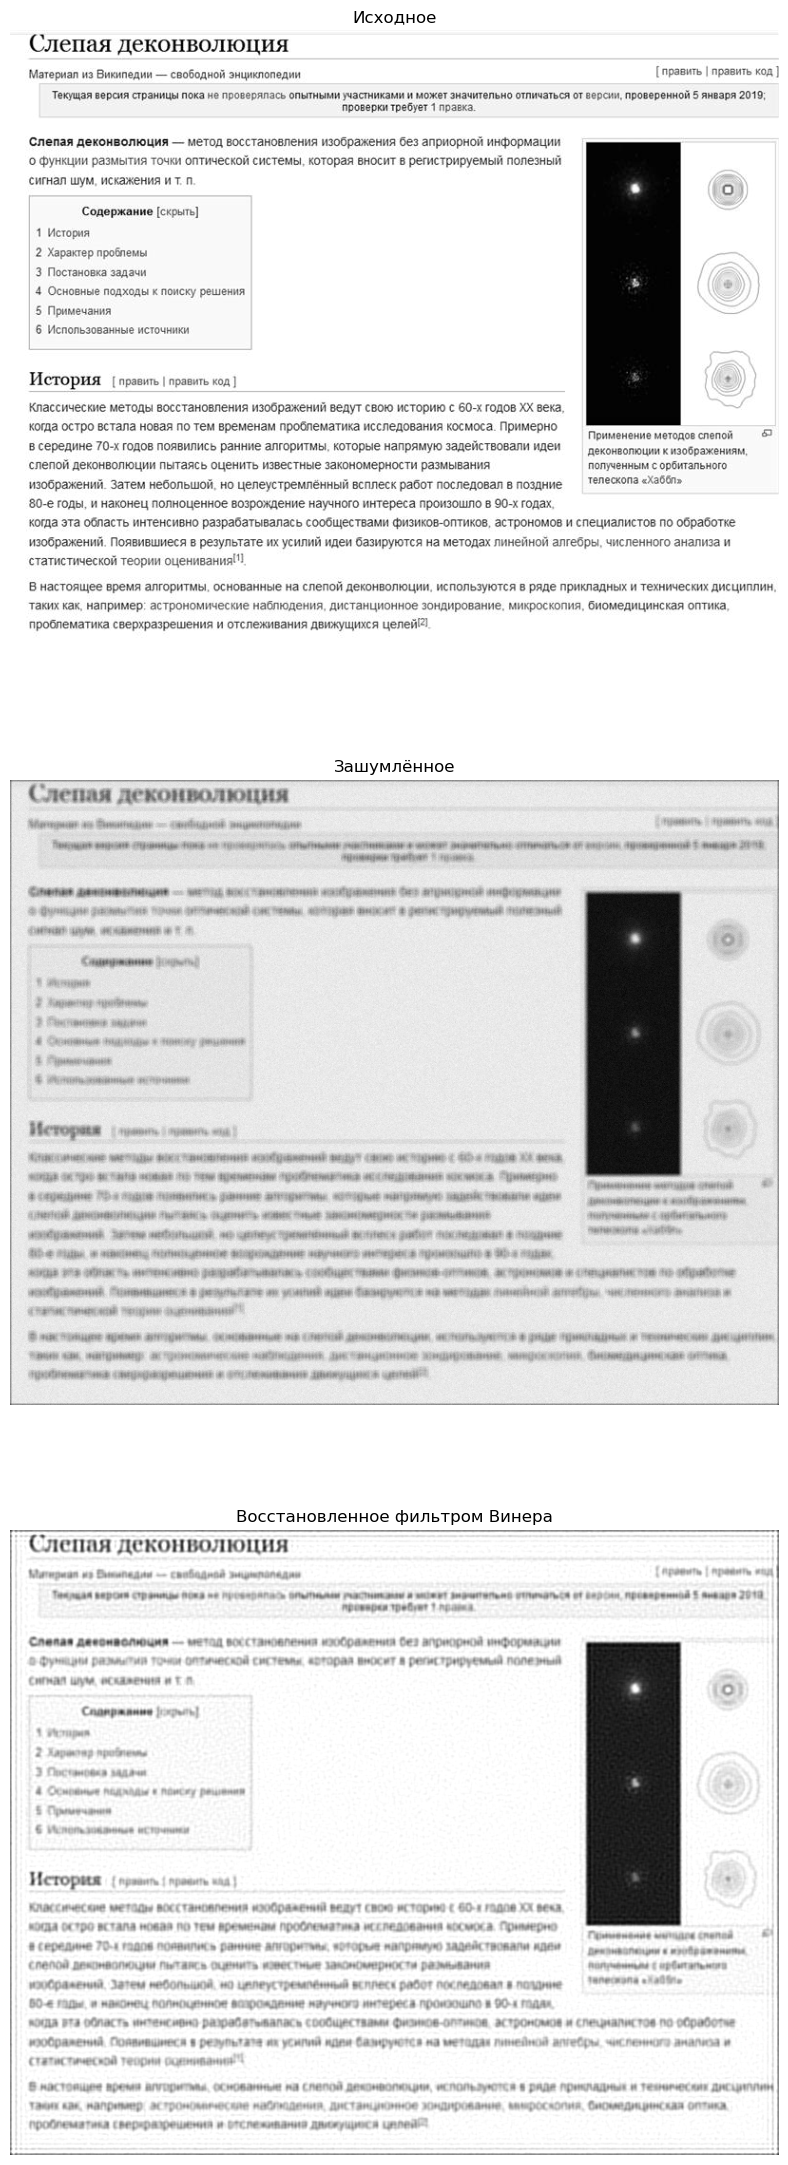

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(50, 25))
plt.gray()


for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(im_orig)
ax[0].set_title('Исходное')

ax[1].imshow(img_noise2)
ax[1].set_title('Зашумлённое')

ax[2].imshow(deconvolved_img, vmin=deconvolved_img.min(), vmax=deconvolved_img.max())
ax[2].set_title('Восстановленное фильтром Винера')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

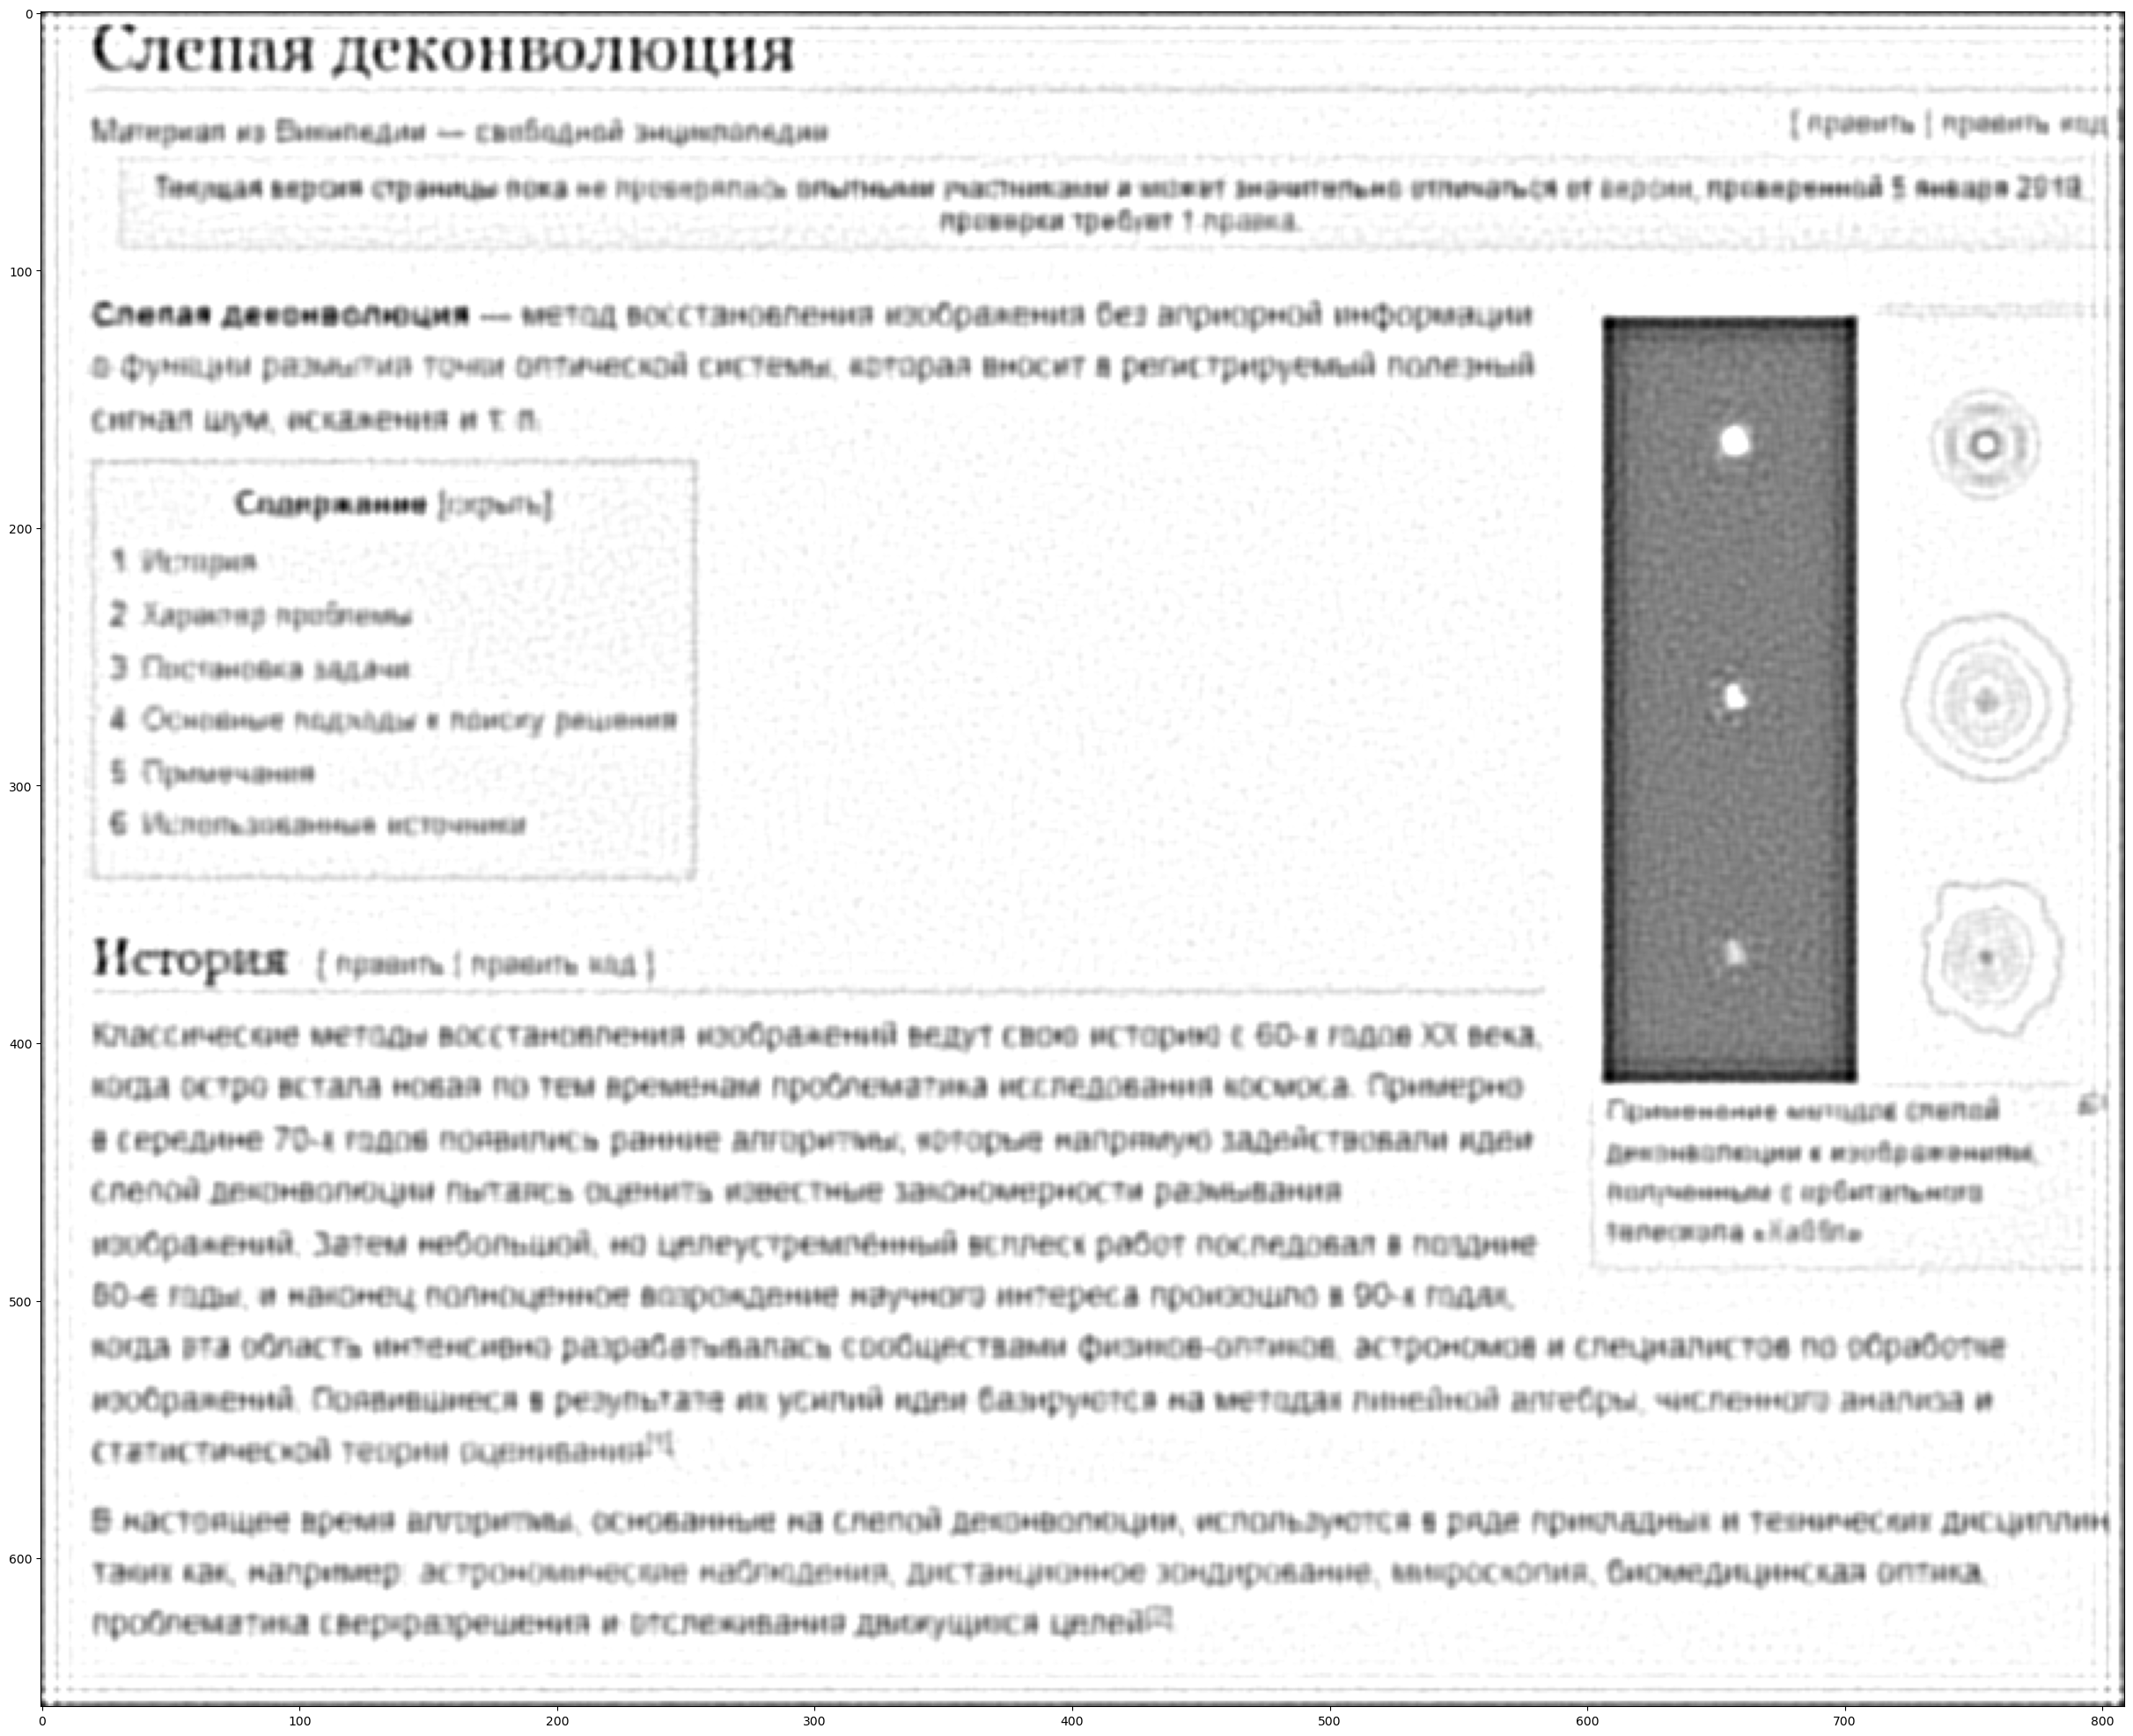

In [18]:
from skimage import filters
image_unsharp = filters.unsharp_mask(deconvolved_img, radius=7, amount=1.5)
plt.subplots(nrows=1, ncols=1, figsize=(50, 25))
plt.imshow(image_unsharp)


Рассмотрим также работу алгоритма Люси-Ричардсона.

In [40]:
im_orig = color.rgb2gray(data.astronaut())
im_orig = color.rgb2gray(plt.imread('source/text.jpg'))

psf = np.ones((5, 5)) / 25
im_noise = conv2(im_orig, psf, 'same')
# Добавим шум
im_noise += 0.02 * np.random.randn(*im_orig.shape)

# Восстановление алгоритмом Люси-Ричардсона
deconvolved_RL = restoration.richardson_lucy(im_noise, psf, num_iter=25)

print('PSNR до:', psnr(im_orig, img_noise))
print('PSNR после:', psnr(im_orig, deconvolved_RL))

PSNR до: 18.428463614784576
PSNR после: 16.700379502131938


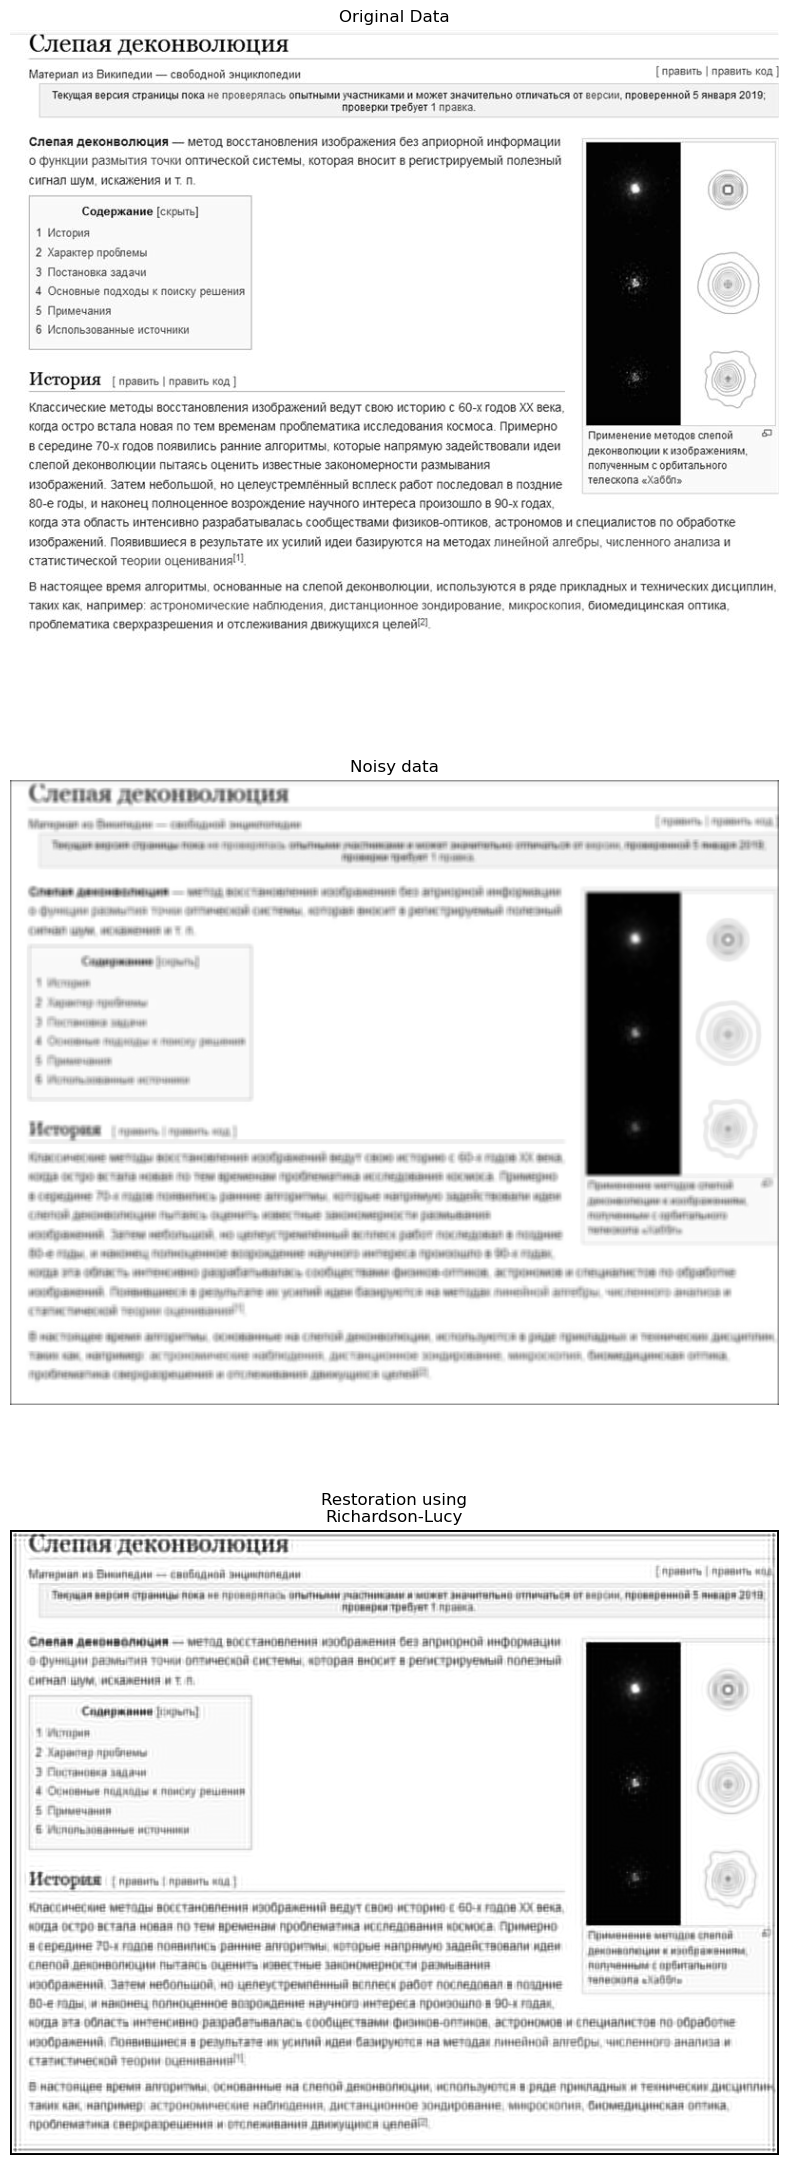

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(50, 25))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(im_orig)
ax[0].set_title('Original Data')

ax[1].imshow(im_noise)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL)
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

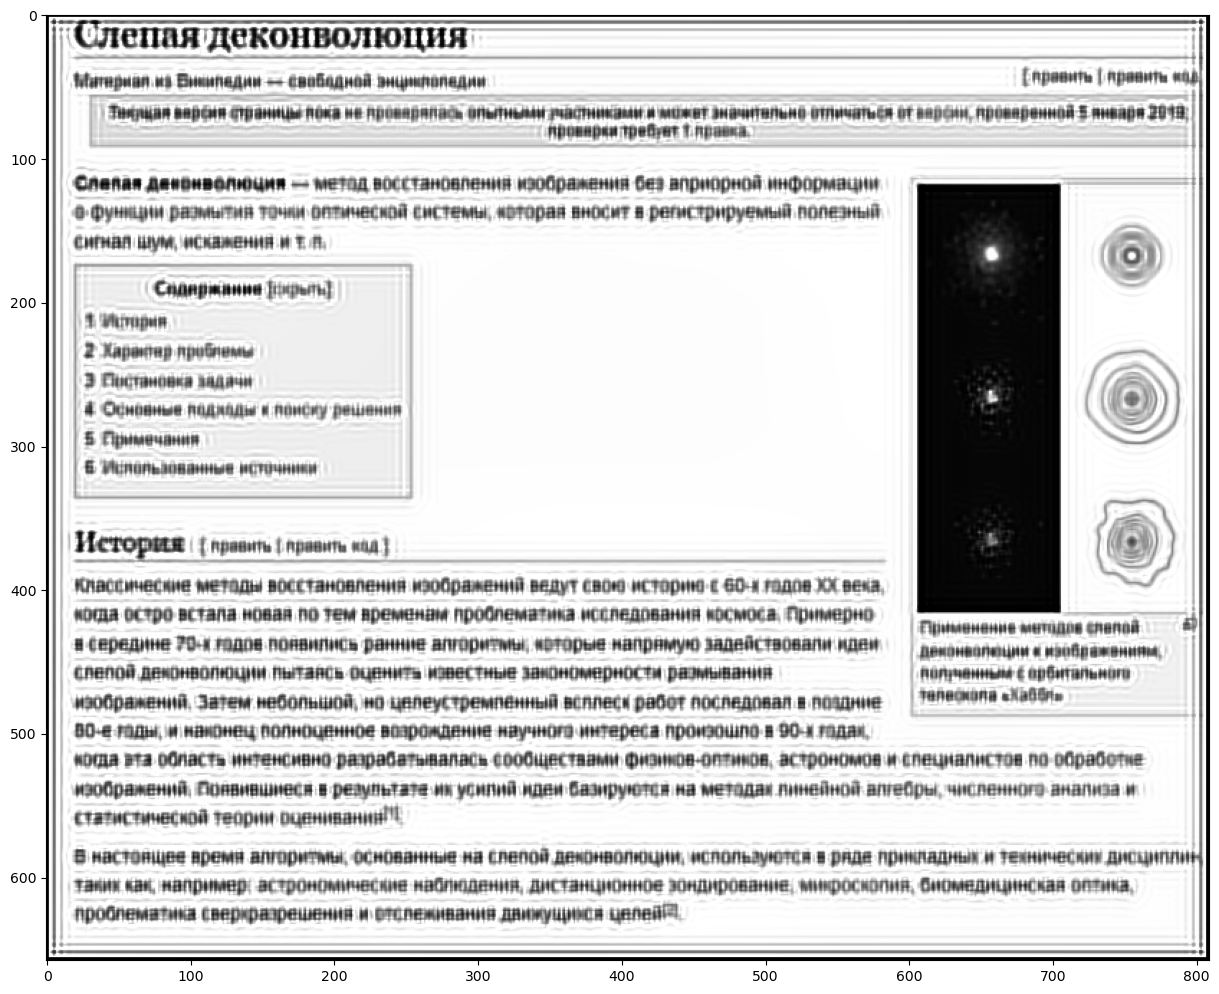

In [34]:
from skimage import exposure
from skimage import filters

image_unsharp = filters.unsharp_mask(deconvolved_RL, radius=3, amount=.5)

img_eq = exposure.equalize_adapthist(image_unsharp)
plt.figure(figsize=(15, 15))
plt.imshow(img_eq)

Рассмотрим ещё один метод, являющийся модификацией фильтра Винера.

In [41]:
im_orig = color.rgb2gray(data.astronaut())
im_orig = color.rgb2gray(plt.imread('source/text.jpg'))

psf = np.ones((5, 5)) / 25
im_noise = conv2(im_orig, psf, 'same')


im_noise += 0.02 * np.random.randn(*im_orig.shape)

# Restore Image using unsupervised Wiener algorithm
deconvolved_W, _ = restoration.unsupervised_wiener(im_noise, psf)

print('PSNR до:', psnr(im_orig, img_noise))
print('PSNR после:', psnr(im_orig, deconvolved_W))

PSNR до: 18.428463614784576
PSNR после: 20.118090470703972


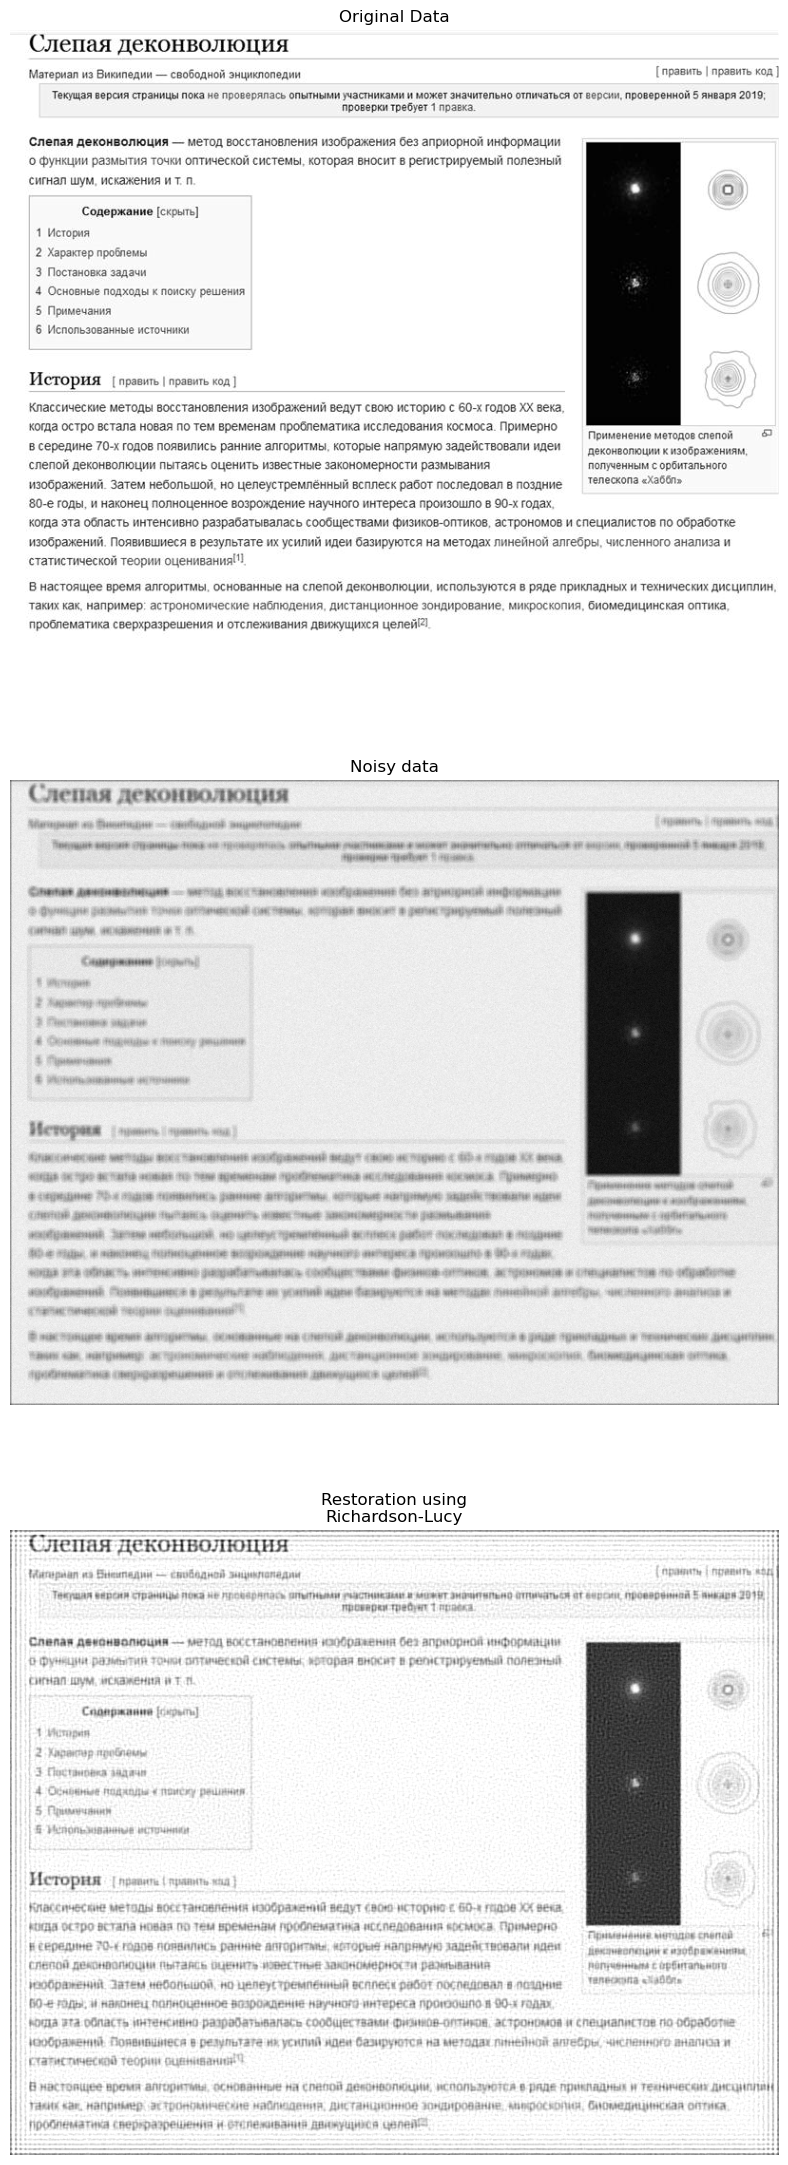

In [42]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(50, 25))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(im_orig)
ax[0].set_title('Original Data')

ax[1].imshow(im_noise)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_W)
ax[2].set_title('Restoration using\nunsupervised Wiener')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()
